In [36]:
#Group Project
#Members:
#Carrie Little
#Devin Eror
#Jasper A. Dolar

In [37]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#train/test/split and StandardScaler libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Model 1 - Logistic Regression - libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Model 2 - Random Forest - libraries
from sklearn.ensemble import RandomForestClassifier

#Model 3 - XGBoost - Libraries
from xgboost import XGBClassifier


#Load dataset
df = pd.read_csv("telco_customer_churn.csv")

#preview data
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
#DATA PROCESSING, CLEANING, AND FEATURE
#clean and process the dataset

#drop customerID column since it's a unique identifier
#and not very helpful for prediction
df.drop("customerID", axis=1, inplace=True)

#make sure - so convert - the 'TotalCharges column to numeric
#to ensure it can be used in modeling
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

#handle missing values in "TotalCharges" by filling with the median
#this is to help maintain integrity of the dataset
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())
#convert variable target "Churn" to binary format
#where Yes = 1, No = 0
#this allows us to use classification models
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})



/var/folders/d5/5gc_skq53hb425lfyjhzy9dh0000gn/T/ipykernel_12861/3444684420.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(["Not Churned (0)", "Churned (1)"])


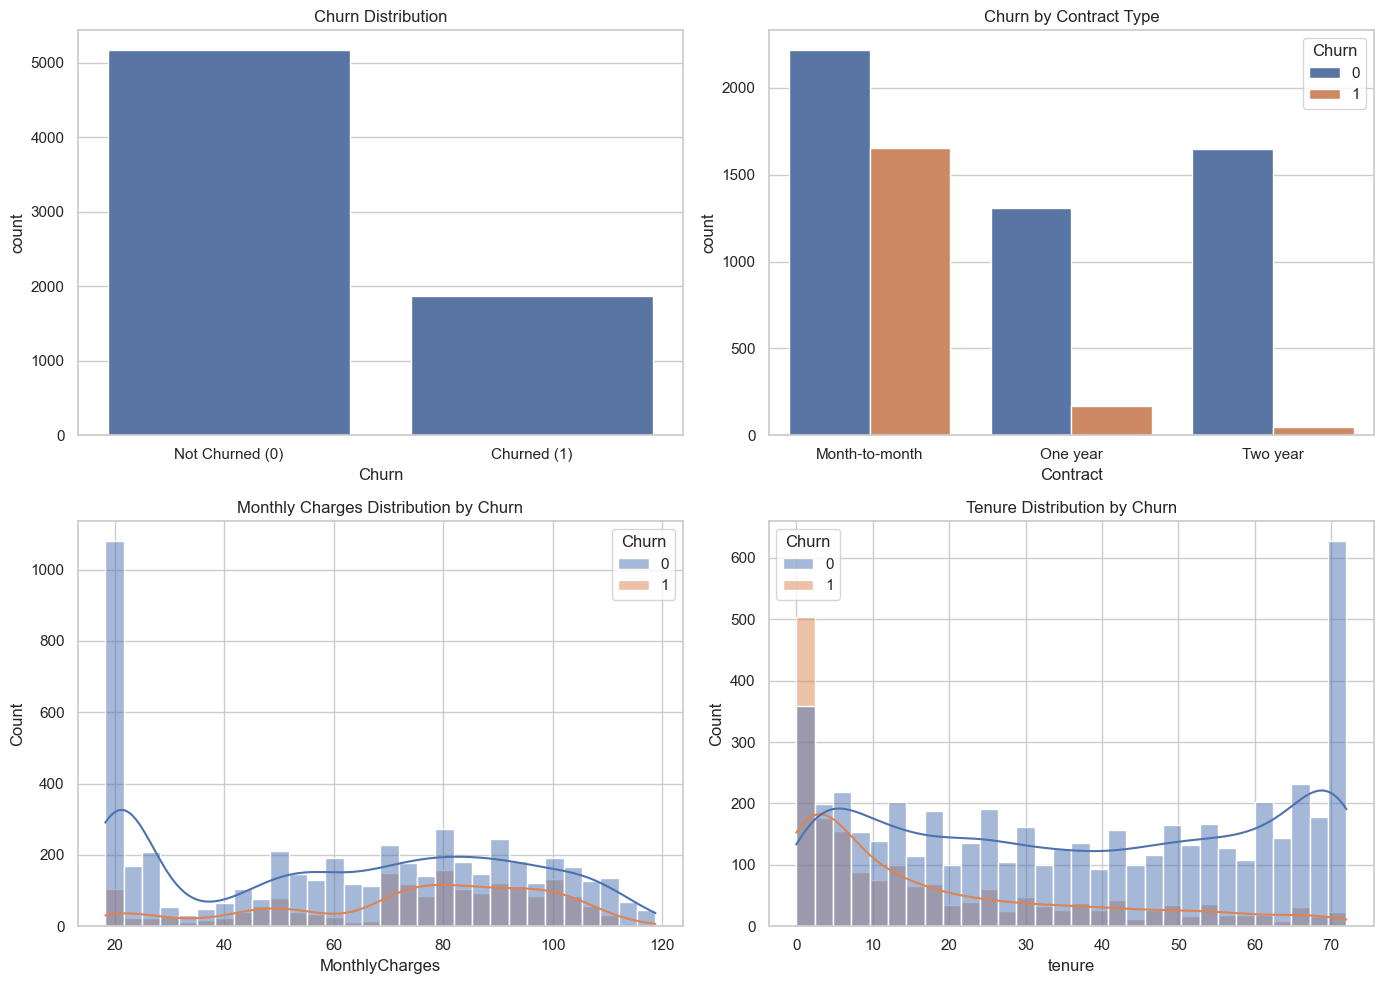

In [39]:
#Visualizations
sns.set(style="whitegrid")

#subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#Plot 1: Churn distribution
sns.countplot(x="Churn",data=df, ax=axes[0,0])
axes[0, 0].set_title("Churn Distribution")
axes[0, 0].set_xticklabels(["Not Churned (0)", "Churned (1)"])

#Plot 2: Contract type vs churn
sns.countplot(x="Contract", hue="Churn", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Churn by Contract Type")
axes[0, 1].legend(title="Churn")

#Plot 3: Monthly Charges Distribution by Churn
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Monthly Charges Distribution by Churn")

#Plot 4: Tenure vs Churn
sns.histplot(data=df, x="tenure", hue="Churn", bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Tenure Distribution by Churn")

plt.tight_layout()
plt.show()

In [40]:
#Visualizations & Interpretations
#Churn distribution: the dataset is not balanced, with noticeably
#more customers not churning than churning. This imbalance must be
#considered when selecting models and evaluation metrics.

#Churn by contract type:
#Customers with month-to-month contracts churn at much
#higher rates than those with one-year or two-year contracts.
#This suggests contract length is a strong predictor of churn

#Monthly Charges Distribution by Churn:
#Customers who churn tend to have slightly higher monthly charges
#compared to those who stay.  There appears to be a churn 
#concentration in mid-to-high charge ranges.

#Tenure Distribution by Churn:
#Customers with shorter tenures are more likely to churn,
#which may indicate that customer loyalty and length of service
#reduce churn risk.

In [41]:
#one-hot encode
#encode categorial values -- convert categorical columns into
#binary variables.  This is needed because many ML models 
#work only with numeric input

df_encoded = pd.get_dummies(df, drop_first=True)

In [42]:
#check shape after one-hot encoding above
df_encoded.shape
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [43]:
#TRAIN-TEST SPLIT AND FEATURE SCALING

#split dataset into features (X) and target (y)
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

#split data into training and testing sets
#80% train, 20% test, random_state = 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [44]:
#MODEL 1 = TRAIN AND EVALUATE MODEL 1 
#MODEL: Logistic Regression

#initialize logistic regression model 
#set max number of iterations to 10000 the solver will run
#while trying to find the best fit for the logistic regression model
model_lr = LogisticRegression(max_iter=1000, random_state=42)

#train model on scaled training data
model_lr.fit(X_train_scaled, y_train)

#predict on test data
y_pred_lr = model_lr.predict(X_test_scaled)

#evaluate the model's performance
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, 
                             target_names = ["Not Churned - 0",
                             "Churned - 1"]))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_lr))



Confusion Matrix
[[933 103]
 [151 222]]

Classification Report:
                 precision    recall  f1-score   support

Not Churned - 0       0.86      0.90      0.88      1036
    Churned - 1       0.68      0.60      0.64       373

       accuracy                           0.82      1409
      macro avg       0.77      0.75      0.76      1409
   weighted avg       0.81      0.82      0.82      1409


Accuracy Score:
0.8197303051809794


In [45]:
#Model 1: Logistic Regression
#Interpretation/Analysis

#The Logistic Regression model achieved:
# - an overall accuracy of 82%.
# - the model performs well at identifying customers
# who are NOT likely to churn (Not Churned - 0) with:
#  - Precision: 0.86 (refers to how many predicted non-churnes were actually correct)
#  - Recall: 0.90 (refers to how many actual non-churners were correctly identified)
#  - F1-Score: 0.88 (this is the harmonic mean of precision and recall, balancing both pretty well - higher the better)

#Performance seems week on predicting churners (Class 1):
#  - Precision: 0.68 (some predicted churners were false positives)
#  - Recall: 0.60 (only 60% of actual churners were detected)
#  - F1-Score: 0.64 (overall effectiveness in capturing churners is moderate - just okay - higher the better)

#The imbalance could be indicative that the model is better
#at identifying customers will not churn (will stay) than those
#likely to leave (churners).  Since churn prediction is 
#a class imbalance project, we will want to explore more 
#powerful/better models next (such as Random Forest, 
#and XGBoost), and look at metrics beyond accuracy such as 
#recall for churned customers.

In [46]:
#MODEL 2 = TRAIN AND EVALUATE MODEL 2
#MODEL: Random Forest Classifier

#initialize Random Forest Model
#will build 100 decision trees n_estimators=100
#each tree is trained on a different bootstrap sample of the
#training data.
#final prediction is determined by majority voting (for classification)
#generally, more trees improve performance and stability but 
#longer computation time
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

#train model on scaled training data
model_rf.fit(X_train_scaled, y_train)

#predict on test data
y_pred_rf = model_rf.predict(X_test_scaled)

#evaluate the model's performance
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report: ")
print(classification_report(y_test, y_pred_rf,
                            target_names = ["Not Churned - 0",
                                            "Churned - 1"]))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_rf))

Confusion Matrix
[[942  94]
 [202 171]]

Classification Report: 
                 precision    recall  f1-score   support

Not Churned - 0       0.82      0.91      0.86      1036
    Churned - 1       0.65      0.46      0.54       373

       accuracy                           0.79      1409
      macro avg       0.73      0.68      0.70      1409
   weighted avg       0.78      0.79      0.78      1409


Accuracy Score:
0.7899219304471257


In [47]:
#Model 2: Random Forest 
#Interpretation / Analysis

#The Random Forest model achieved an accuracy of about 79%,
#which is slighly lower than Logistic Regression.
#The model seems to continue to perform well at identifying
#customers who are not likely to churn (Class 0):
# - Precision: 0.82 (refers to how many predicted non-churners were actually correct)
# - Recall: 0.91 (refers to how many actual non-churners were correctly identified)
# - F1-Score: 0.86 (balances both this is the harmonic mean of precision and recall, higher is better )

#However, the model's performance on predicting churners (Class 1) is
#noticeably weaker:
# - Precision: 0.65 (fair number of false positives)
# - Recall: 0.46 (less than half of actual churners were detected)
# - F1-Score: 0.54 (this indicates bad overall performance on churn prediction, higher the better)

#Overall, the Random Forest slightly underperforms compared to Logistic Regression
#in terms of identifying churners.  
#It performs well for non-churners but still seem to struggle
#to catch customers who actually leave (churners).

In [48]:
#MODEL 3 = TRAIN AND EVALUATE MODEL 3
#MODEL: XGBoost Classifier

#Initialize XGBoost model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

#train model on scaled training data
model_xgb.fit(X_train_scaled, y_train)

#predict on test data
y_pred_xgb = model_xgb.predict(X_test_scaled)

#evaluate the model's performance
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report: ")
print(classification_report(y_test, y_pred_xgb,
                            target_names = ["Not Churned -0",
                                            "Churned - 1"]))

print("\nAccuracy Score: ")
print(accuracy_score(y_test, y_pred_xgb))

Confusion Matrix
[[926 110]
 [187 186]]

Classification Report: 
                precision    recall  f1-score   support

Not Churned -0       0.83      0.89      0.86      1036
   Churned - 1       0.63      0.50      0.56       373

      accuracy                           0.79      1409
     macro avg       0.73      0.70      0.71      1409
  weighted avg       0.78      0.79      0.78      1409


Accuracy Score: 
0.7892122072391767


/opt/anaconda3/envs/topicmodel-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:43:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [49]:
#Model 3: XGBoost Classifier
#Interpretation / Analysis

#The XGBoost model achieved an accuracy of about 79%, 
#similar to the Random Forest model.

#Performance for non-churners (Class 0) remains strong:
# - Precision: 0.83 (most predicted non-churners actually non-churners)
# - Recall: 0.89 (89% of actual non-churners were correctly identified)
# - F1-Score: 0.86 (good balance between precision and recall)

#Performance for churners (Class 1) is lightly better than Random Forest:
# - Precision: 0.63 (moderate false positives)
# - Recall: 0.50 (half of actual churners were correctly identified)
# - F1-Score: 0.56 (slightly better than Random Forest's 0.54)

#Overall, XGBoost performs comparably to Random Forest in overall accuracy,
#but slightly better in detecting churners (higher F1-score for Class 1).
#However, it still shows room for improvement in recall for churners,
#suggesting a need to explore class imbalance handling in future iterations.


/var/folders/d5/5gc_skq53hb425lfyjhzy9dh0000gn/T/ipykernel_12861/4274839637.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importance_df.head(15),


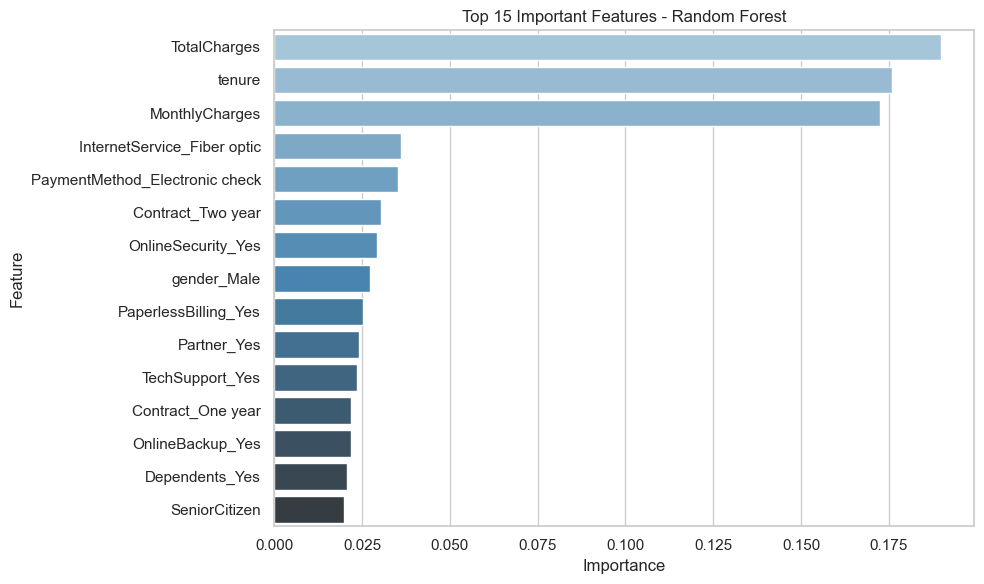

In [50]:
#Feature Importance Using Random Forest

#Get feature importances
importances = model_rf.feature_importances_
feature_names = X.columns

#create DataFrame for better plotting
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

#plot top 15 most important features
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importance_df.head(15),
    palette="Blues_d")
plt.title("Top 15 Important Features - Random Forest")
plt.tight_layout()
plt.show()

In [51]:
#The Random Forest model highlights the most influential features
#in predicting customer churn:
# - TotalCharges, tenure, and MonthlyCharges are the top three
#predictors - these financial and engagement metrics strongly influence 
#whether a customer stays or leaves.
# - Fiber optic internet and electronic check payments are associated
#with higher churn risk, possibly because of cost-sensitive or less 
#satisfied customer segments.
#Contract type (especially two-year contracts) and services like
#OnlineSecurity and TechSUpport also impact churn - longer commitments
#and added support seem to reduce the risk of churn.
#Demographics like gender and SeniorCitizens have low impact compared
#to service-related and billing features.

#-------
#These insights from the plots can help the business 
#focus retention efforts on customers with high charges,
#short tenure, and less stable contract or payment setups.

In [52]:
#Model Comparison Summary


#Metric                       | Logistic Regression | Random Forest | XGBoost
#Accuracy                     |         82%         |      79%      |   79%
#Precision (Class 1 - Churned)|         0.68        |      0.65     |   0.63
#Recall (CLass 1 - Churned)   |         0.60        |      0.46     |   0.50
#F1-Score (Class 1 - Churned) |         0.64        |      0.54     |   0.56

#Logistic Regression achieved the highest recall and F1-Score
#for predicting churned customers, which is crucial in churn 
#prediction where false negatives (missed churners) are costly.

#Random Forest and XGBoost performed similarly in terms of overall
#accuracy but had weaker recall and F1-Scores on the churn class.

#While Random Forest and XGBoost offer model complexity and robustness,
#Logistic Regression provided a better sensitivity (recall) and balance 
#for churn detection.

In [53]:
#FINAL CONCLUSION

#In this project, we built and evaluated three machine learning
#models: Logistic Regression Random Forest, and XGBoost - to 
#predict customer churn the telecommunications industry using the 
#IBM Telco Customer Churn Dataset.  Our goal was to help the business
#identity which customers are likelty to leave, so retentiondfff department
#can be proactively applied.

#DEPLOYMENT PLAN
#To turn this customer churn prediction model into a usable
#business tool, we propose a batch deployment approach integrated
#into the company's existing analytics system.
#The goal is to flag potentially churn-prone customers on a regular
#schedule (say weekly or monthly), enabling the retention team to
#timely intervene 